In [659]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random

In [660]:
applePrices = open('./data/A.json')
applePricesArray = json.load(applePrices)

In [661]:
def supportAndResistance(arr, force=3):
      # create a dictionary to count the number of occurrences of each element
    counts = {}
    for n in arr:
        element = int(n)
        if element in counts:
            counts[element] += 1
        else:
            counts[element] = 1
    # create a new array with the elements that appear more than 5 times in the original array
    more_than_five = [element for element, count in counts.items() if count > force]
    return more_than_five

def moving_average(stock_prices, window_size=2):
    moving_averages = []
    for i in range(len(stock_prices) - window_size + 1):
        moving_averages.append(sum(stock_prices[i:i+window_size]) / window_size)
    return moving_averages

def get_next_low_high(arr, x):
  # Sort the array in ascending order
  arr.sort()
  
  # Initialize variables to store the next low and high values
  next_low = -10000
  next_high = 10000
  
  # Find the next low value
  for i in range(len(arr)):
    if arr[i] < int(x):
      next_low = arr[i]
    else:
      break
  
  # Find the next high value
  for i in range(len(arr)-1, -1, -1):
    if arr[i] > int(x):
      next_high = arr[i]
    else:
      break
  
  return (next_low, next_high)


def percentageDifference(a, b):
  return abs((a - b))

def shouldByOrSell(price, support, resistance):

  
  resistanceDiff = round(percentageDifference(price, resistance),2)
  supportDiff = round(percentageDifference(price, support),2)

  if resistanceDiff > supportDiff * 2 and support < price:
    return True


  return False


    

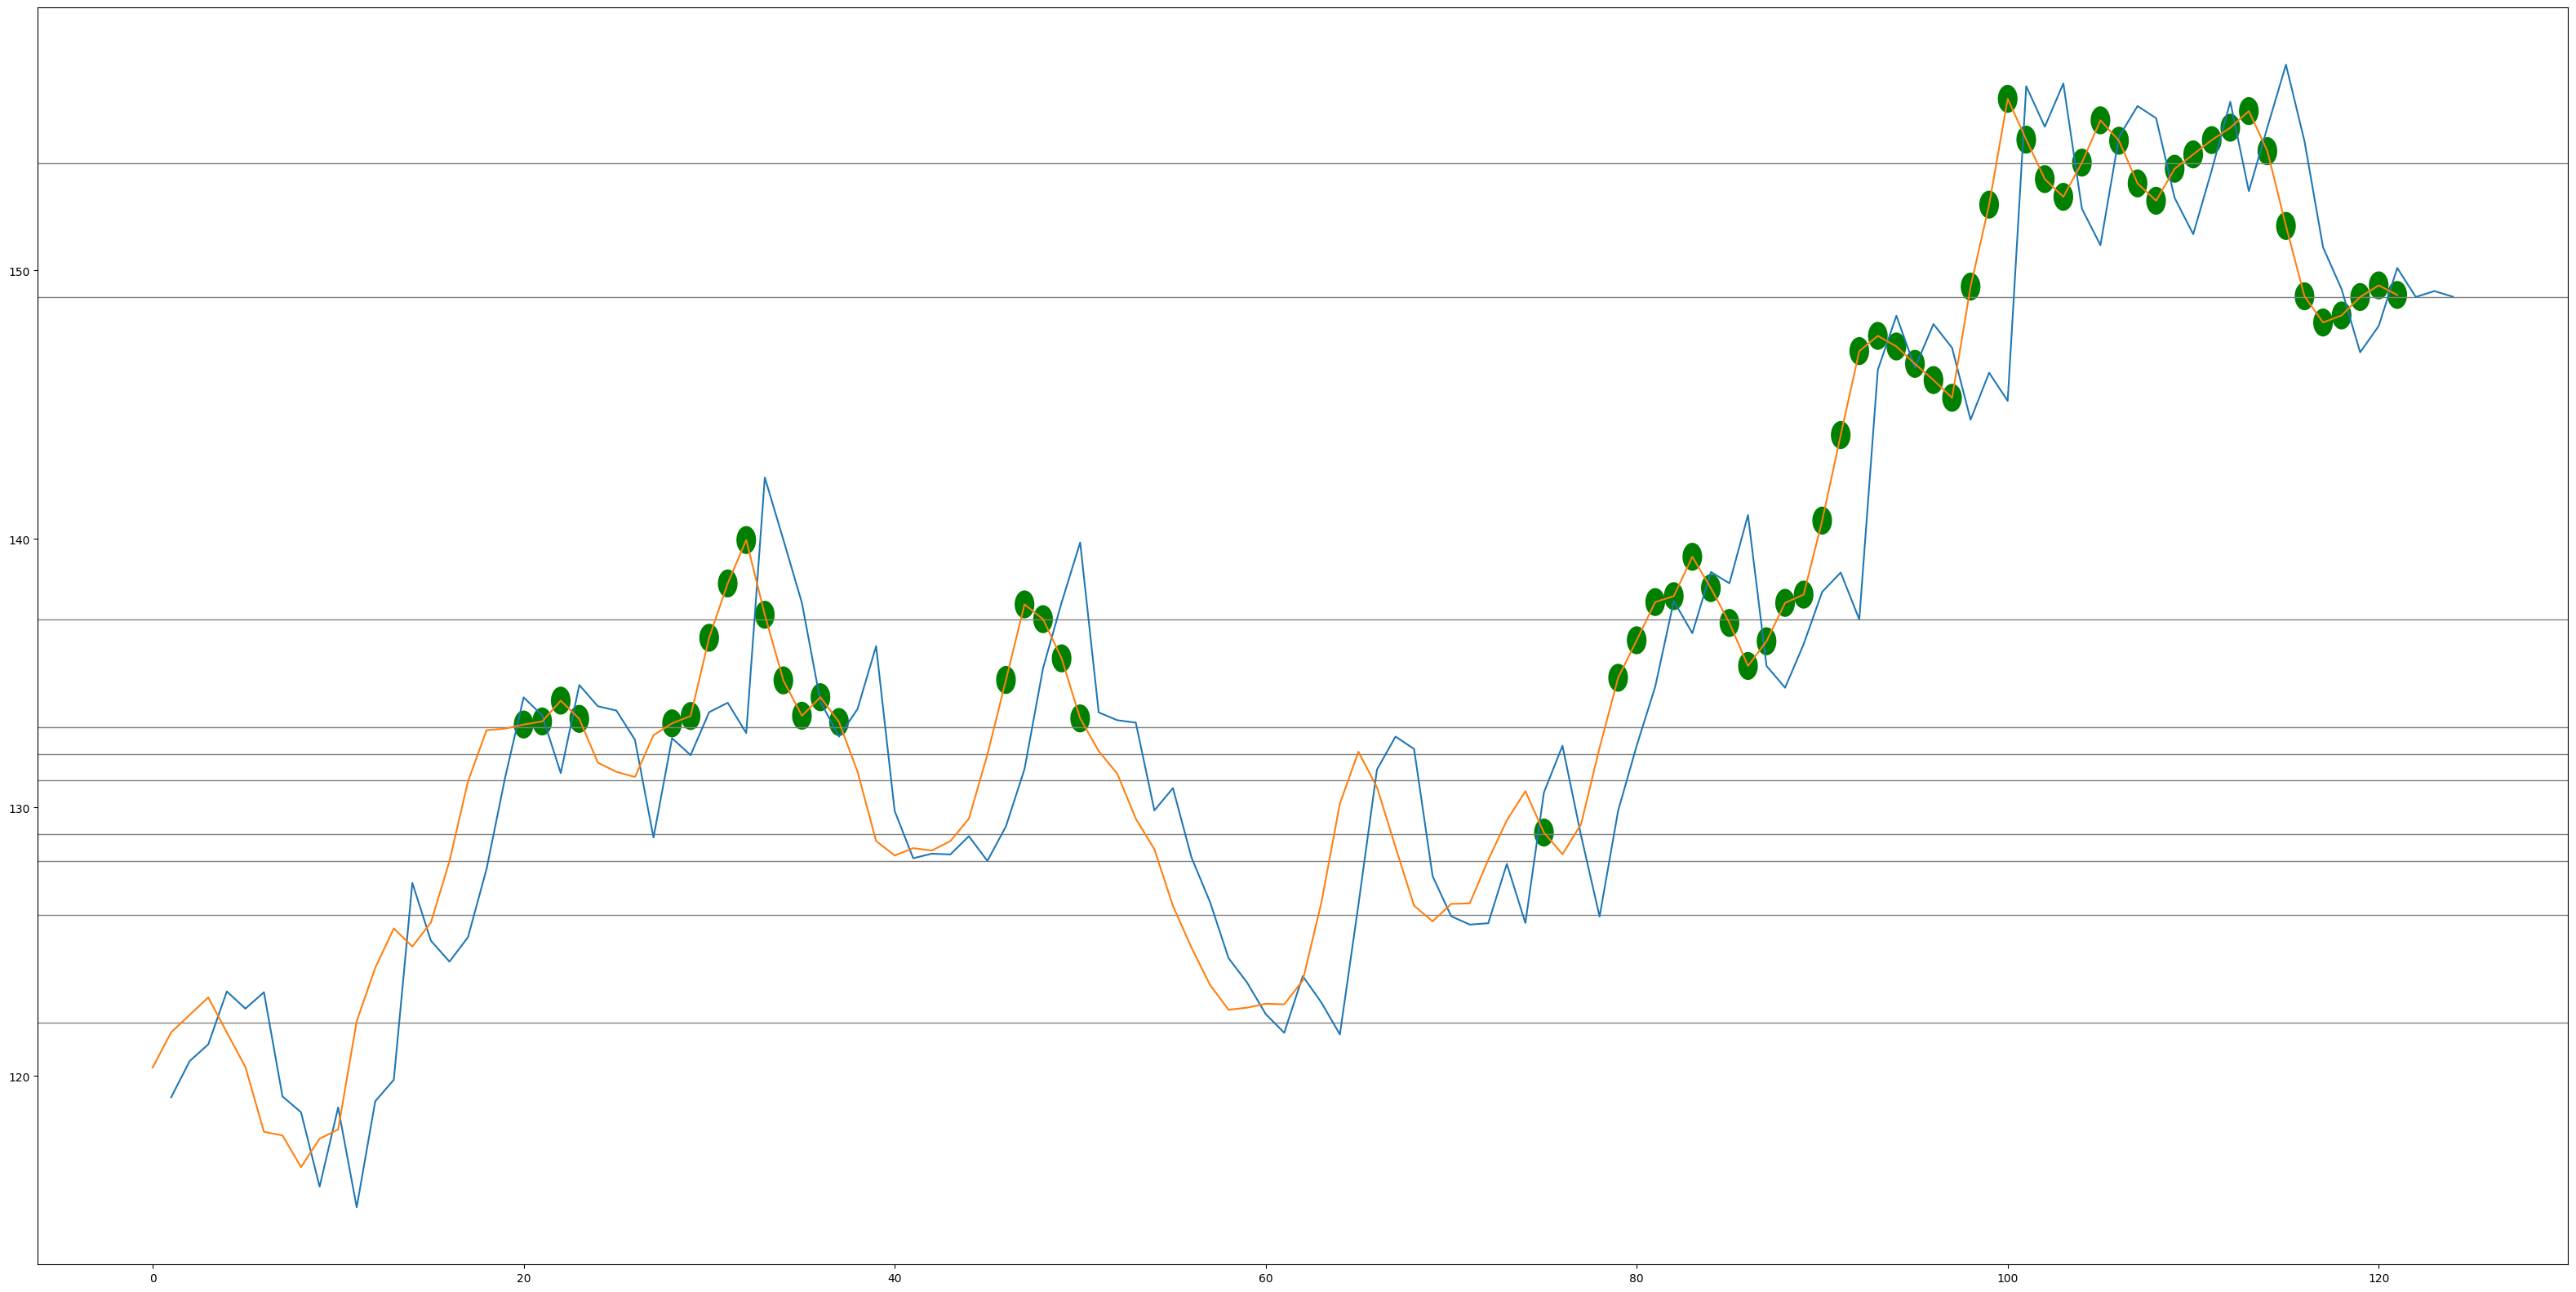

In [662]:
xpoints = np.array(list(range(1,len(applePricesArray) +1)))
ypoints = np.array(applePricesArray)
moving_average = moving_average(applePricesArray,3)


# for sr in supportAndResistance(applePricesArray, 5):
#     plt.axhline(y = sr, color = 'r', linestyle = '-', linewidth = 3)

for sr in supportAndResistance(moving_average, 4):
    plt.axhline(y = sr, color = 'grey', linestyle = '-', linewidth = 1)

for idx, price in enumerate(moving_average):
    next_low, next_high = get_next_low_high(supportAndResistance(applePricesArray,5), price)
    # print("Low : ", next_low, "   Price : ",price, "    High : ",next_high)
    if shouldByOrSell(price, next_low, next_high):
        circle1 = plt.Circle((idx, price), .5, color='g')
        plt.gca().add_patch(circle1)
    # print(shouldByOrSell(price, next_low, next_high))
        # circle1 = plt.Circle((price, idx), .5, color='g', fill=False)
        # plt.gca().add_patch(circle1)


plt.rcParams["figure.figsize"] = (40,20)
plt.plot(xpoints, ypoints, moving_average)
plt.show()